In [1]:
from utils.helper import  *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
f_dir = 'diagnostic_data/softness_test_bare/'
# read all trials
n_trials = 2
n_iter = 20
objs=['stiff_block' , 'soft_block', 'sponge']
all_trials = list()
all_trials_rbtq = list()

for i in range(2,n_trials+1):
    for j in range(1,n_iter+1):
        for obj in objs:
            if (i == 1) & (j == 20):
                continue
                
            fname = f_dir + f"{obj}_trial{i}_{j}"
            temp_df_rbtq, start_time = read_robotiq(fname+'.rbtq')
            
            temp_df_rbtq = temp_df_rbtq.assign(iteration = j)
            temp_df_rbtq = temp_df_rbtq.assign(obj = obj)
            all_trials_rbtq.append(temp_df_rbtq)
            
            temp_df = read_tac_file2(fname+'.tact', start_time)
            #print(temp_df_rbtq.time[0], temp_df.time[0])
            temp_df = temp_df[temp_df.taxel != 0]
            temp_df = temp_df.assign(iteration = j)
            temp_df = temp_df.assign(obj = obj)
            all_trials.append(temp_df)

In [3]:
#start_time

In [5]:
df_rbtq = pd.concat(all_trials_rbtq)
df = pd.concat(all_trials)
def map_to_finger(taxel_id):
    if (taxel_id <= 39) & (taxel_id >=1):
        return 'left_finger'
    else :
        return 'right_finger'

df = df.assign(finger_type = df.taxel.apply(map_to_finger))

In [6]:
df_rbtq.head()

,time,target,current,iteration,obj
0,0.000000,0,3,1,stiff_block
1,0.005420,255,3,1,stiff_block
2,0.013418,255,3,1,stiff_block
3,0.021373,255,3,1,stiff_block
4,0.029314,255,4,1,stiff_block


In [7]:
df.head()

,isNeg,taxel,time,iteration,obj,finger_type
0,0,43,2.800899,1,stiff_block,right_finger
1,0,43,2.800936,1,stiff_block,right_finger
2,0,43,2.800959,1,stiff_block,right_finger
3,0,43,2.816913,1,stiff_block,right_finger
4,0,13,2.816947,1,stiff_block,left_finger


### Spike Counts
1. Total
2. By polarity
3. By obj

In [8]:
count_df = df.groupby(['obj', 'isNeg', 'iteration']).count().reset_index()

In [9]:
count_df

,obj,isNeg,iteration,taxel,time,finger_type
0,soft_block,0,1,6987,6987,6987
1,soft_block,0,2,6865,6865,6865
2,soft_block,0,3,7239,7239,7239
3,soft_block,0,4,6842,6842,6842
4,soft_block,0,5,6906,6906,6906
...,...,...,...,...,...,...
115,stiff_block,1,16,451,451,451
116,stiff_block,1,17,515,515,515
117,stiff_block,1,18,547,547,547
118,stiff_block,1,19,826,826,826


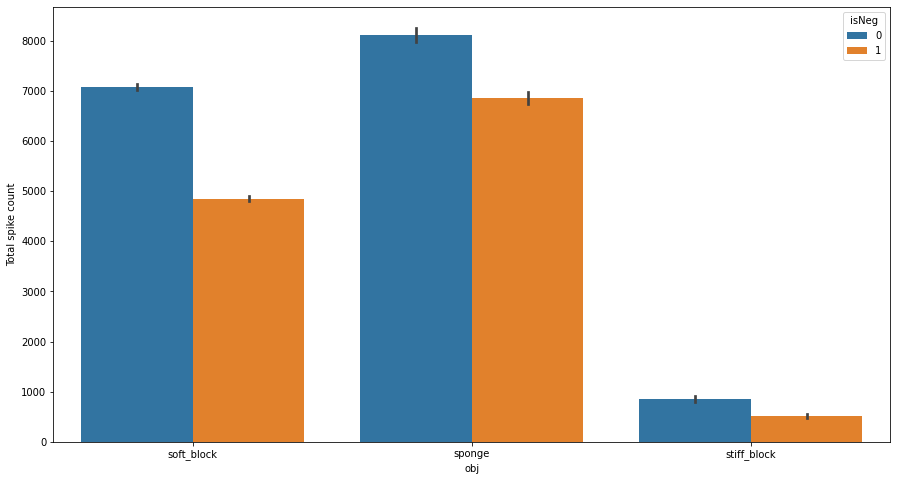

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(ax=ax, x = 'obj', y='time', hue='isNeg', data=count_df)
#ax.set_ylim([3500,6500])
ax.set_ylabel('Total spike count')
plt.show()

In [12]:
### See spikes over time
t_range = np.linspace(0, 4.4, 220)
df_bin_range = pd.cut(df.time, t_range)
groups = df.groupby(['iteration', 'finger_type','obj', df_bin_range]).count()
count_df = groups.add_suffix('_count').reset_index()
def map_to_cat(x):
    return np.float(x.right)
count_df = count_df.assign(time_int = count_df.time.apply(map_to_cat).astype(np.float))

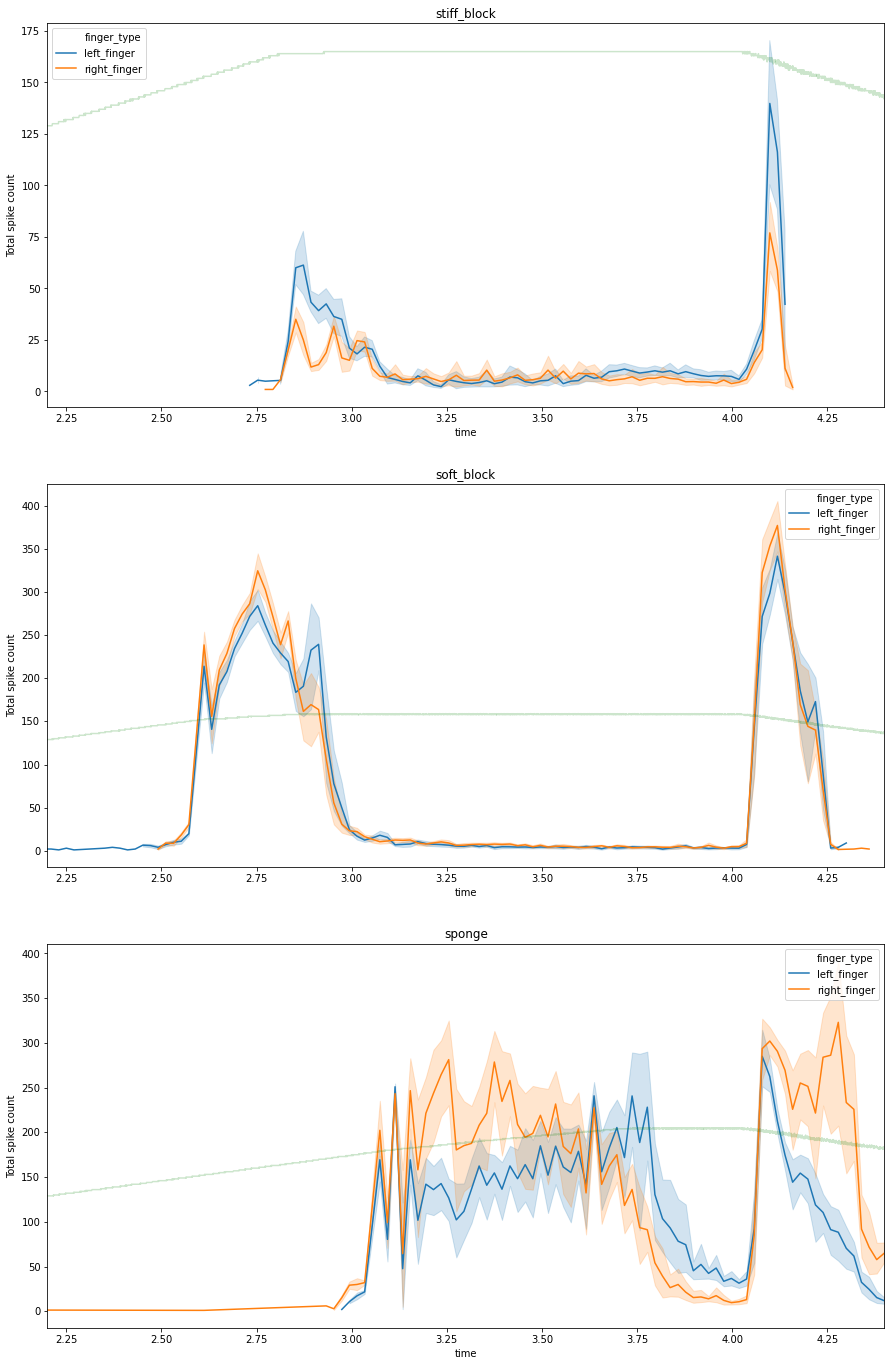

In [13]:
fig, ax = plt.subplots(3,figsize=(15,8*3))
for i in range(3):
    sns.lineplot(ax=ax[i], x = 'time_int', y='taxel_count', hue='finger_type', data=count_df[count_df.obj == objs[i]])
    #ax.set_ylim([3500,6500])
    ax[i].set_title(objs[i])
    sns.lineplot(ax=ax[i], x = 'time', y='current', data=df_rbtq[df_rbtq.obj == objs[i]], alpha=0.2, color='g')
    ax[i].set_ylabel('Total spike count')
    ax[i].set_xlim([2.2, 4.4])
plt.show()

### Stiff block left
![log](diagnostic_data/taxel_imgs2/stiff_block_left_finger_1.png)
### Stiff block right
![log](diagnostic_data/taxel_imgs2/stiff_block_right_finger_2.png)

### Soft block left
![log](diagnostic_data/taxel_imgs2/soft_block_left_finger_1.png)
### Soft block right
![log](diagnostic_data/taxel_imgs2/soft_block_right_finger_1.png)

### Sponge left
![log](diagnostic_data/taxel_imgs2/sponge_left_finger_1.png)
### Sponge right
![log](diagnostic_data/taxel_imgs2/sponge_right_finger_1.png)